# Reading in Data

In [1]:
import sys

sys.path.append('..')

In [2]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import logging

logging.basicConfig(level=logging.INFO)

In [4]:
from loading import load_train, load_test
from preprocessing import preprocess

[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jonas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### prepare data

In [5]:
df_train = load_train(full=False, dir="../twitter-datasets", y_col="label", neg_label=0)
df_train['train'] = True
df_train

,index,x,label,train
0,199368,"sharper image hd120 "" direct upload to youtube...",0,True
1,49268,<user> #teamfollowbck plz follow <user> he's i...,1,True
2,182254,"<user> hey , sorry uh didnt turn up today . i ...",0,True
3,125729,( ( <user> hate it ( ( ( rt <user> ouh man bpn...,0,True
4,52649,<user> twitter won't let me dm you ! wednesday...,1,True
...,...,...,...,...
199995,179719,<user> i'm not sleepy yet and its too early\n,0,True
199996,51928,<user> get some rest tomorrow gonna b long too...,1,True
199997,23637,the devil is tryna bring me down right now . b...,1,True
199998,127732,| infinity reference 6032cf 6.5- inch 180 - wa...,0,True


In [19]:
df_test = load_test(dir='../twitter-datasets')
df_test['train'] = False
df_test

,x,train
1,sea doo pro sea scooter ( sports with the port...,False
2,<user> shucks well i work all week so now i ca...,False
3,i cant stay away from bug thats my baby\n,False
4,<user> no ma'am ! ! ! lol im perfectly fine an...,False
5,"whenever i fall asleep watching the tv , i alw...",False
...,...,...
9996,had a nice time w / my friend lastnite\n,False
9997,<user> no it's not ! please stop !\n,False
9998,not without my daughter ( dvd two-time oscar (...,False
9999,<user> have fun in class sweetcheeks\n,False


In [20]:
df = pd.concat([df_train, df_test])
df['text'] = df['x']
df['x'] = df['x'].apply(lambda x: x.replace('\n', ''))
df

,index,x,label,train,text
0,199368.0,"sharper image hd120 "" direct upload to youtube...",0.0,True,"sharper image hd120 "" direct upload to youtube..."
1,49268.0,<user> #teamfollowbck plz follow <user> he's i...,1.0,True,<user> #teamfollowbck plz follow <user> he's i...
2,182254.0,"<user> hey , sorry uh didnt turn up today . i ...",0.0,True,"<user> hey , sorry uh didnt turn up today . i ..."
3,125729.0,( ( <user> hate it ( ( ( rt <user> ouh man bpn...,0.0,True,( ( <user> hate it ( ( ( rt <user> ouh man bpn...
4,52649.0,<user> twitter won't let me dm you ! wednesday...,1.0,True,<user> twitter won't let me dm you ! wednesday...
...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite,NaN,False,had a nice time w / my friend lastnite\n
9997,NaN,<user> no it's not ! please stop !,NaN,False,<user> no it's not ! please stop !\n
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,False,not without my daughter ( dvd two-time oscar (...
9999,NaN,<user> have fun in class sweetcheeks,NaN,False,<user> have fun in class sweetcheeks\n


In [21]:
PREPROCESSING = {'remove_tags': True}

preprocess(df, flags=PREPROCESSING)
df

,index,x,label,train,text
0,199368.0,"sharper image hd120 "" direct upload to youtube...",0.0,True,"sharper image hd120 "" direct upload to youtube..."
1,49268.0,#teamfollowbck plz follow he's is so sweet & ...,1.0,True,<user> #teamfollowbck plz follow <user> he's i...
2,182254.0,"hey , sorry uh didnt turn up today . i know go...",0.0,True,"<user> hey , sorry uh didnt turn up today . i ..."
3,125729.0,( ( hate it ( ( ( rt ouh man bpnv again tomo...,0.0,True,( ( <user> hate it ( ( ( rt <user> ouh man bpn...
4,52649.0,twitter won't let me dm you ! wednesday is gre...,1.0,True,<user> twitter won't let me dm you ! wednesday...
...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite,NaN,False,had a nice time w / my friend lastnite\n
9997,NaN,no it's not ! please stop !,NaN,False,<user> no it's not ! please stop !\n
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,False,not without my daughter ( dvd two-time oscar (...
9999,NaN,have fun in class sweetcheeks,NaN,False,<user> have fun in class sweetcheeks\n


In [22]:
try:
    os.remove('tweets.txt')
except OSError:
    pass

f = open('tweets.txt', 'w')
for index, row in df.iterrows():
    f.write(row['x']+"\n")
f.close()

### embeddings

In [23]:
import fasttext

In [24]:
model = fasttext.train_unsupervised('tweets.txt', model='skipgram', dim=100)

Read 3M words
Number of words:  21815
Number of labels: 0
Progress: 100.0% words/sec/thread:  195107 lr:  0.000000 avg.loss:  2.080035 ETA:   0h 0m 0s


In [25]:
df['vec'] = df['x'].apply(model.get_sentence_vector)

In [26]:
df

,index,x,label,train,text,vec
0,199368.0,"sharper image hd120 "" direct upload to youtube...",0.0,True,"sharper image hd120 "" direct upload to youtube...","[0.06283861, -0.01616549, 0.042154294, -0.0536..."
1,49268.0,#teamfollowbck plz follow he's is so sweet & ...,1.0,True,<user> #teamfollowbck plz follow <user> he's i...,"[0.021618528, 0.024330046, 0.10532276, -0.0129..."
2,182254.0,"hey , sorry uh didnt turn up today . i know go...",0.0,True,"<user> hey , sorry uh didnt turn up today . i ...","[0.078024365, 0.051120132, 0.05449112, -0.0336..."
3,125729.0,( ( hate it ( ( ( rt ouh man bpnv again tomo...,0.0,True,( ( <user> hate it ( ( ( rt <user> ouh man bpn...,"[0.050872333, 0.03711895, -0.007660336, -0.043..."
4,52649.0,twitter won't let me dm you ! wednesday is gre...,1.0,True,<user> twitter won't let me dm you ! wednesday...,"[0.03831239, 0.05322759, 0.03207829, -0.042172..."
...,...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite,NaN,False,had a nice time w / my friend lastnite\n,"[-0.004571821, 0.002213429, 0.038501166, -0.06..."
9997,NaN,no it's not ! please stop !,NaN,False,<user> no it's not ! please stop !\n,"[0.059232444, 0.053611092, 0.052736174, -0.019..."
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,False,not without my daughter ( dvd two-time oscar (...,"[0.012399442, -0.0078012096, 0.020196326, -0.0..."
9999,NaN,have fun in class sweetcheeks,NaN,False,<user> have fun in class sweetcheeks\n,"[0.03134435, 0.03247145, 0.051208843, -0.05784..."


### clustering

In [27]:
# sum_of_squared_distances = []
# K = range(1,10)
# for k in tqdm(range(1, 10)):
#     km = KMeans(n_clusters=k)
#     km = km.fit(pd.DataFrame(df['vec'].values.tolist()))
#     sum_of_squared_distances.append(km.inertia_)

In [28]:
# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [33]:
kmeans = KMeans(n_clusters=7)

In [34]:
df['cluster'] = kmeans.fit_predict(df['vec'].values.tolist())

In [35]:
df

,index,x,label,train,text,vec,cluster
0,199368.0,"sharper image hd120 "" direct upload to youtube...",0.0,True,"sharper image hd120 "" direct upload to youtube...","[0.06283861, -0.01616549, 0.042154294, -0.0536...",0
1,49268.0,#teamfollowbck plz follow he's is so sweet & ...,1.0,True,<user> #teamfollowbck plz follow <user> he's i...,"[0.021618528, 0.024330046, 0.10532276, -0.0129...",2
2,182254.0,"hey , sorry uh didnt turn up today . i know go...",0.0,True,"<user> hey , sorry uh didnt turn up today . i ...","[0.078024365, 0.051120132, 0.05449112, -0.0336...",4
3,125729.0,( ( hate it ( ( ( rt ouh man bpnv again tomo...,0.0,True,( ( <user> hate it ( ( ( rt <user> ouh man bpn...,"[0.050872333, 0.03711895, -0.007660336, -0.043...",6
4,52649.0,twitter won't let me dm you ! wednesday is gre...,1.0,True,<user> twitter won't let me dm you ! wednesday...,"[0.03831239, 0.05322759, 0.03207829, -0.042172...",3
...,...,...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite,NaN,False,had a nice time w / my friend lastnite\n,"[-0.004571821, 0.002213429, 0.038501166, -0.06...",6
9997,NaN,no it's not ! please stop !,NaN,False,<user> no it's not ! please stop !\n,"[0.059232444, 0.053611092, 0.052736174, -0.019...",2
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,False,not without my daughter ( dvd two-time oscar (...,"[0.012399442, -0.0078012096, 0.020196326, -0.0...",1
9999,NaN,have fun in class sweetcheeks,NaN,False,<user> have fun in class sweetcheeks\n,"[0.03134435, 0.03247145, 0.051208843, -0.05784...",6


In [43]:
df.groupby('cluster')['label'].value_counts()

cluster  label
0        0.0      12980
         1.0        301
1        0.0      17011
         1.0       2221
2        1.0      16038
         0.0       4595
3        1.0      11171
         0.0       4202
4        0.0      33789
         1.0      30914
5        0.0       1975
         1.0          5
6        1.0      39350
         0.0      25448
Name: label, dtype: int64

In [37]:
df[df['train']][['text', 'label', 'cluster']].to_csv('train.csv')

In [39]:
df[~df['train']][['text', 'cluster']].to_csv('test.csv')

### visualize clustering

In [40]:
pca = PCA(n_components=3)
res = pca.fit_transform(df['vec'].values.tolist())

df['coord_x'] = res[:,0]
df['coord_y'] = res[:,1]
df['coord_z'] = res[:,2]

print(pca.explained_variance_ratio_)

[0.22483488 0.0599079  0.04097099]


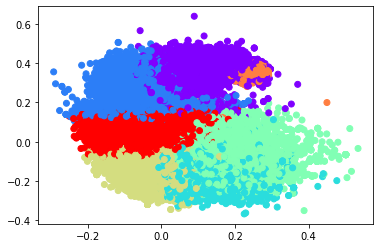

In [41]:
plt.scatter(df['coord_y'], df['coord_x'], c=df['cluster'], cmap='rainbow')

/var/folders/gq/4c0zg0rx0pv4n82cfglq0vb00000gn/T/ipykernel_35311/1593339746.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


Text(0.5, 0.92, 'Tweet Clustering using K Means')

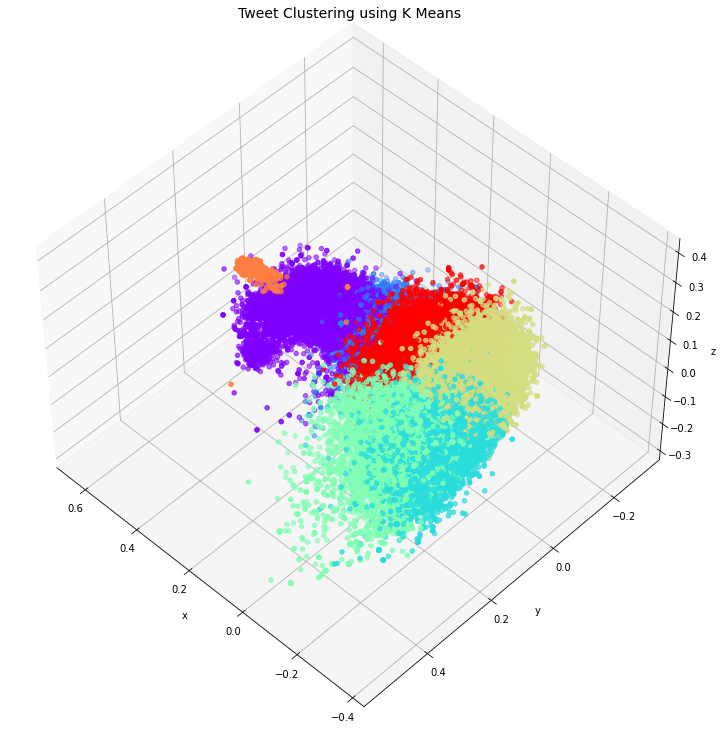

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df['coord_x'], df['coord_y'], df['coord_z'], c=df['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Tweet Clustering using K Means", fontsize=14)